In [ ]:
!wget "https://www.dropbox.com/scl/fo/hlujog78gi4zy8duy683h/AF-i2zym-HVnaEKJe4MhEv4?rlkey=tzdr361wsqcr1oda3vrfmypcf&dl=1" -O dropbox_folder.zip
!unzip dropbox_folder.zip -d extracted_data/

--2025-06-26 23:12:44--  https://www.dropbox.com/scl/fo/hlujog78gi4zy8duy683h/AF-i2zym-HVnaEKJe4MhEv4?rlkey=tzdr361wsqcr1oda3vrfmypcf&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uce3276e1ff6c1acf5aeee2e9718.dl.dropboxusercontent.com/zip_download_get/CPwIhEGrgFz0PcGS8SbTdOrIVWseR1B7PgOaabXKl-Z95cnkhcg0dPbO1OwcAX4_flMlU5wdjJFjmiFOXr9AtimX1dV17nwM5hxpBgTnX86R6Q# [following]
--2025-06-26 23:12:45--  https://uce3276e1ff6c1acf5aeee2e9718.dl.dropboxusercontent.com/zip_download_get/CPwIhEGrgFz0PcGS8SbTdOrIVWseR1B7PgOaabXKl-Z95cnkhcg0dPbO1OwcAX4_flMlU5wdjJFjmiFOXr9AtimX1dV17nwM5hxpBgTnX86R6Q
Resolving uce3276e1ff6c1acf5aeee2e9718.dl.dropboxusercontent.com (uce3276e1ff6c1acf5aeee2e9718.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f
Connecting to uce3276e1ff6c1acf5aeee2e9718.dl.d

**“Other” refers to households where the head lives with individuals who are not a spouse or their own children. This category includes situations where the head lives with parents, grandparents, siblings, grandchildren, uncles, aunts, nephews, nieces, cousins, foster children, or unrelated adults such as roommates or boarders. These individuals reside in the head's household.**

# Data And Visualization For the 2016 and INDIV


In [ ]:
#read the merged file
import pandas as pd
merged = pd.read_parquet("/content/extracted_data/MergedData/IndALL_2015_2016.parquet")
merged2015=pd.read_parquet("/content/extracted_data/IndivData/2015.parquet")
merged = pd.concat([merged,merged2015],ignore_index=True)

In [ ]:
#Number of Generational unique families
print("Number Of Generational Families",merged['Perm_FID'].nunique())

#number of indiviauls that  participated in the survey Oly
print('Number Of Indiviuals ',len(merged[merged['year']==2016]))

#all families that particpated (include families made after a child grows into an adult)
print('All Families ',(merged[merged['year']==2016])['family_id'].nunique())

#Number Of Indivuals that answered the first question related to the numerical literacy
print('number of indivuals that answered the first question  '  , len(merged[(merged['WB16K1']==1) | (merged['WB16K1']==5)]))



Number Of Generational Families 2107
Number Of Indiviuals  8341
All Families  5763
number of indivuals that answered the first question   8226


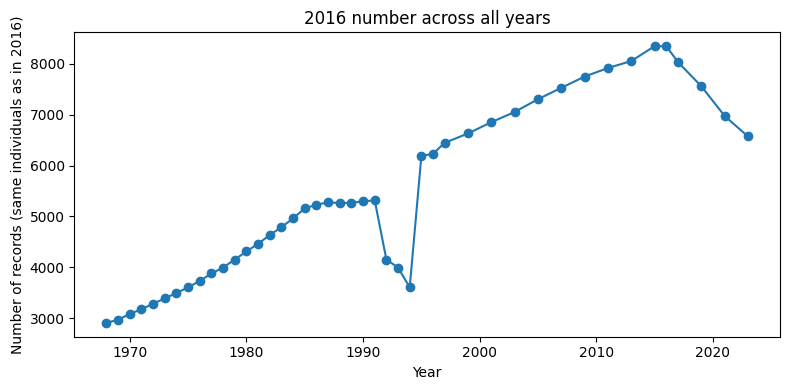

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 0) Point to your DataFrame and the relevant column names
# ------------------------------------------------------------------
df          = merged            # <-- change if your DataFrame is named differently
col_year    = "year"            # e.g. "wave", "survey_year"
col_family  = "Perm_FID"        # family identifier
col_person  = "Perm_IID"          # person identifier (individual)
# 1) Build the set of (family, person) pairs observed in 2016 only
# ------------------------------------------------------------------
keys_2016 = (
    df.loc[df[col_year] == 2016, [col_family, col_person]]
      .drop_duplicates()
)
# 2) Keep rows whose key exists in that 2016 subset
#    (inner-joining is vectorised and memory-efficient)
# ------------------------------------------------------------------
df_subset = (
    df.merge(keys_2016, on=[col_family, col_person], how="inner")
)

# 3) Row-count per year for that restricted population
# ------------------------------------------------------------------
year_counts = (
    df_subset.groupby(col_year)
             .size()
             .reset_index(name="n_records")
             .sort_values(col_year)
)


# 4) Quick line plot (optional)
# ------------------------------------------------------------------
plt.figure(figsize=(8,4))
plt.plot(year_counts[col_year], year_counts["n_records"], marker="o")
plt.xlabel("Year")
plt.ylabel("Number of records (same individuals as in 2016)")
plt.title("2016 number across all years")
plt.tight_layout()
plt.show()

**The figure shows a consistent increase in the number of individuals (tracked since 2016) across years, with a dip around the early 1990s likely due to sample changes. The trend confirms strong longitudinal continuity in the dataset.:**

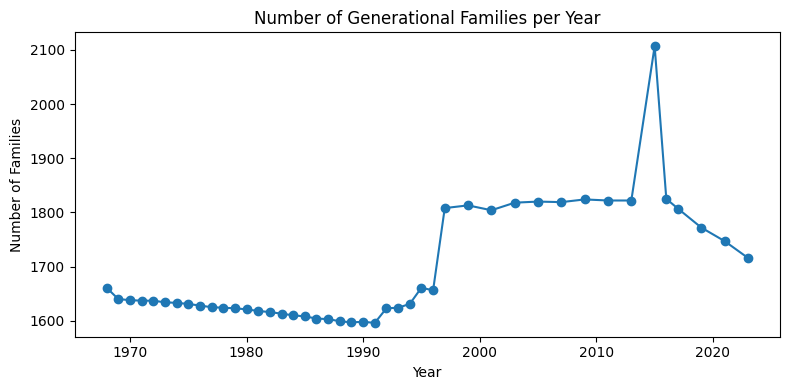

In [ ]:
#plots

import pandas as pd
import matplotlib.pyplot as plt

# 1) Replace “merged” with your DataFrame name
df = merged

# 2) Edit these if your column names differ
col_year   = "year"       # e.g. "year", "survey_year", "YR"
col_family = "Perm_FID"   # unique family identifier

# 3) Count unique families per year
counts = (
    df.groupby(col_year)[col_family]
      .nunique()
      .reset_index(name="n_families")
      .sort_values(col_year)
)

# 4) Plot
plt.figure(figsize=(8,4))
plt.plot(counts[col_year], counts["n_families"], marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Families")
plt.title("Number of Generational Families per Year")
plt.tight_layout()
plt.show()



**The number of generational families remains fairly stable over time, with a notable increase in the mid-1990s and a spike around 2015. This likely reflects improvements in linking family units across generations in newer waves.**

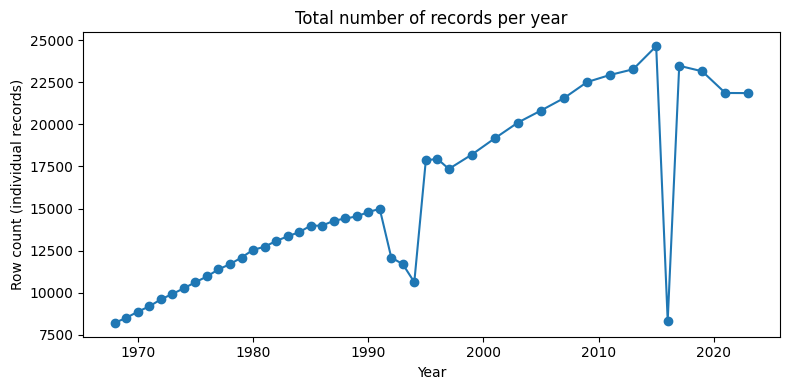

In [ ]:
# df = your DataFrame (e.g. merged)
col_year = "year"        # adjust if named differently

row_counts = (
    df.groupby(col_year)
      .size()                 # counts rows
      .reset_index(name="n_records")
      .sort_values(col_year)
)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(row_counts[col_year], row_counts["n_records"], marker="o")
plt.xlabel("Year")
plt.ylabel("Row count (individual records)")
plt.title("Total number of records per year")
plt.tight_layout()
plt.show()

**The total number of individual records increases steadily over time, with sharp drops around the early 1990s and 2017, likely due to data collection issues or processing anomalies. Overall, the trend reflects growing sample coverage in PSID.**

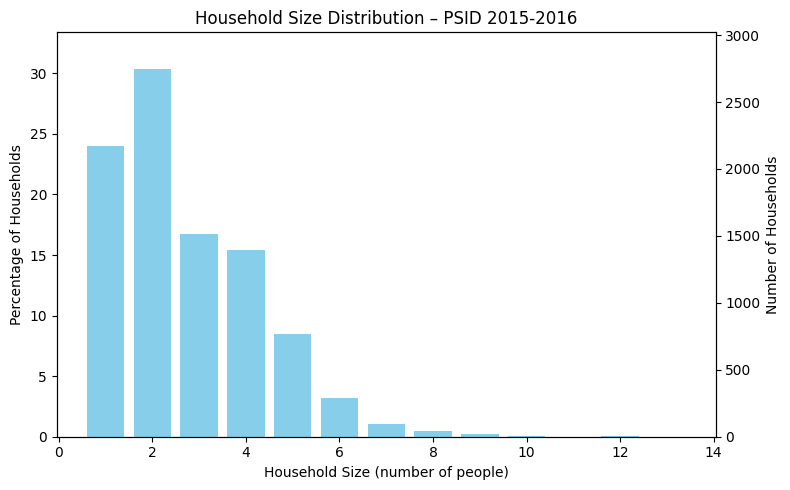

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# ---- 1. Filter 2015 data ----
df2017 = merged[merged["year"] == 2015]

# ---- 2. Count people per household ----
household_sizes = df2017.groupby("ER34301").size()

# ---- 3. Distribution: counts ➜ percentages ----
size_counts = household_sizes.value_counts().sort_index()
size_percent = (size_counts / size_counts.sum()) * 100

# ---- 4. Plot with dual y-axes ----
fig, ax1 = plt.subplots(figsize=(8, 5))

bars = ax1.bar(size_percent.index, size_percent.values, color="skyblue")
ax1.set_xlabel("Household Size (number of people)")
ax1.set_ylabel("Percentage of Households")
ax1.set_ylim(0, size_percent.max() * 1.1)
ax1.set_title("Household Size Distribution – PSID 2015-2016")

# Right Y-axis: Raw counts
ax2 = ax1.twinx()
ax2.set_ylabel("Number of Households")
ax2.set_ylim(0, size_counts.max() * 1.1)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



**The distribution shows that most households in the 2015–2016 PSID consist of 1 to 4 members, with two-person households being the most common. Larger household sizes are increasingly rare.**

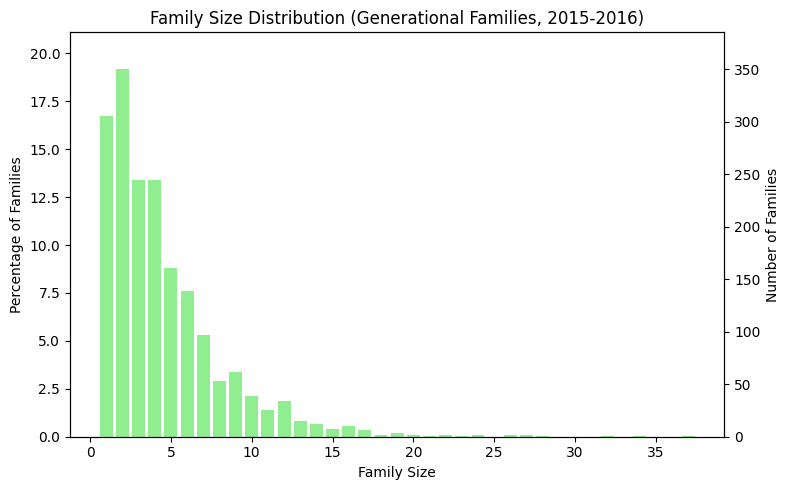

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter 2016 data
df2015 = merged[merged["year"] == 2016]

# Step 1: Count individuals per family
family_sizes = df2015.groupby("Perm_FID").size()

# Step 2: Count how many families are of each size
family_size_counts = family_sizes.value_counts().sort_index()
family_size_percent = (family_size_counts / family_size_counts.sum()) * 100

# Step 3: Plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(8, 5))

bars = ax1.bar(family_size_counts.index, family_size_percent.values, color="lightgreen")
ax1.set_xlabel("Family Size")
ax1.set_ylabel("Percentage of Families")
ax1.set_ylim(0, family_size_percent.max() * 1.1)
ax1.set_title("Family Size Distribution (Generational Families, 2015-2016)")

# Right Y-axis for number of families
ax2 = ax1.twinx()
ax2.set_ylabel("Number of Families")
ax2.set_ylim(0, family_size_counts.max() * 1.1)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




**The majority of generational families in the 2015–2016 PSID have fewer than 6 members, with a steep decline in frequency as family size increases, indicating that very large extended families are rare.**

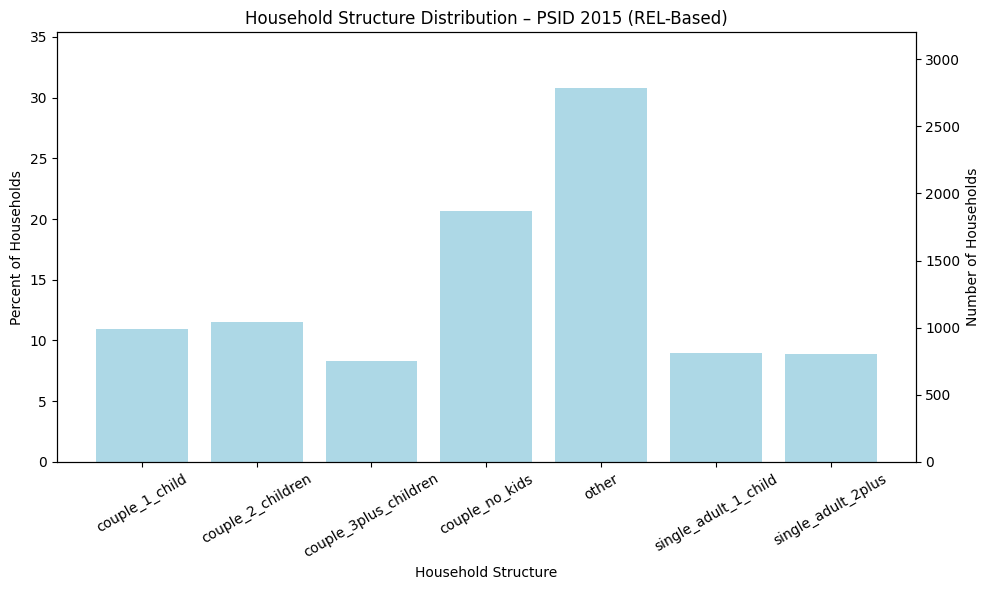

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------- 1. LOAD & PREPARE ----------
df = merged[merged["year"] == 2015].copy()
df.rename(columns={"ER34301": "HH_ID", "ER34303": "REL"}, inplace=True)
df["REL"] = pd.to_numeric(df["REL"], errors="coerce").fillna(0).astype(int)

# ---------- 2. GROUP ATTRIBUTES ----------
grouped = df.groupby("HH_ID")
size = grouped.size()
has_spouse = grouped["REL"].apply(lambda x: any(r in [20, 22] for r in x))
num_children = grouped["REL"].apply(lambda x: sum(r in (30, 33, 35) for r in x))

hh = pd.DataFrame({
    "size": size,
    "spouse": has_spouse,
    "children": num_children
})

# ---------- 3. CLASSIFY STRUCTURE ----------
def classify(r):
    if r.size == 1:
        return "single_adult"
    if r.spouse:
        if r.children == 0: return "couple_no_kids"
        elif r.children == 1: return "couple_1_child"
        elif r.children == 2: return "couple_2_children"
        else: return "couple_3plus_children"
    if r.children == 1: return "single_adult_1_child"
    if r.children >= 2: return "single_adult_2plus"
    return "other"

hh["structure"] = hh.apply(classify, axis=1)

# ---------- 4. PLOT ----------
counts = hh["structure"].value_counts().sort_index()
percent = (counts / counts.sum() * 100).round(2)

fig, ax1 = plt.subplots(figsize=(10, 6))

bars = ax1.bar(percent.index, percent.values, color="lightblue")
ax1.set_ylabel("Percent of Households")
ax1.set_ylim(0, percent.max() * 1.15)
ax1.set_title("Household Structure Distribution – PSID 2015 (REL-Based)")
ax1.set_xlabel("Household Structure")
ax1.tick_params(axis='x', rotation=30)

# Right y-axis for raw counts
ax2 = ax1.twinx()
ax2.set_ylabel("Number of Households")
ax2.set_ylim(0, counts.max() * 1.15)

plt.tight_layout()
plt.show()


